In [1]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

#misc
from datetime import datetime

import xlrd

In [2]:
greenhouse = pd.read_parquet('../data/GreenhouseClimate.parquet')
resources = pd.read_parquet('../data/Resources.parquet')

In [3]:
df = resources
df.head(-1)

,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,43815,2.19,0.7,0.0,0.009824,0.2,0.0
1,43816,0.92,0.8,0.6,0.015908,0.0,0.0
2,43817,1.26,0.9,0.6,0.014698,0.0,0.0
3,43818,0.75,0.8,0.6,0.023630,0.1,0.0
4,43819,0.84,1.4,0.6,0.021622,0.1,0.0
...,...,...,...,...,...,...,...
160,43975,1.90,0.0,0.0,0.024418,3.4,2.2
161,43976,0.87,0.0,0.0,0.051433,2.3,0.1
162,43977,1.03,0.0,0.0,0.041604,2.2,0.0
163,43978,0.56,0.0,0.0,0.057403,2.2,0.0


In [4]:
times = df['%Time '].values
new_times = [xlrd.xldate_as_datetime(time, 0 ) for time in times]
df['elec'] = df['ElecHigh'] + df['ElecLow']

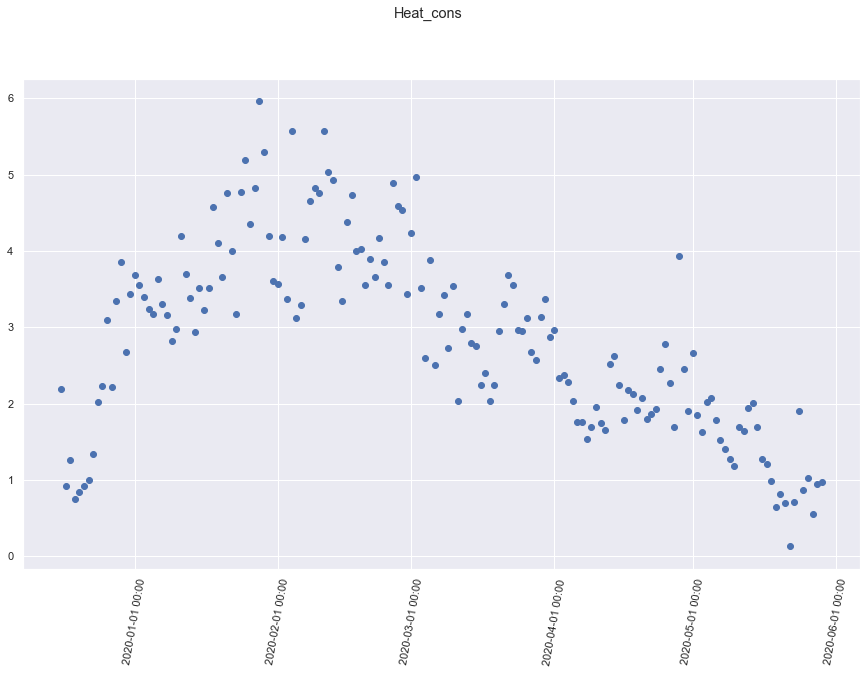

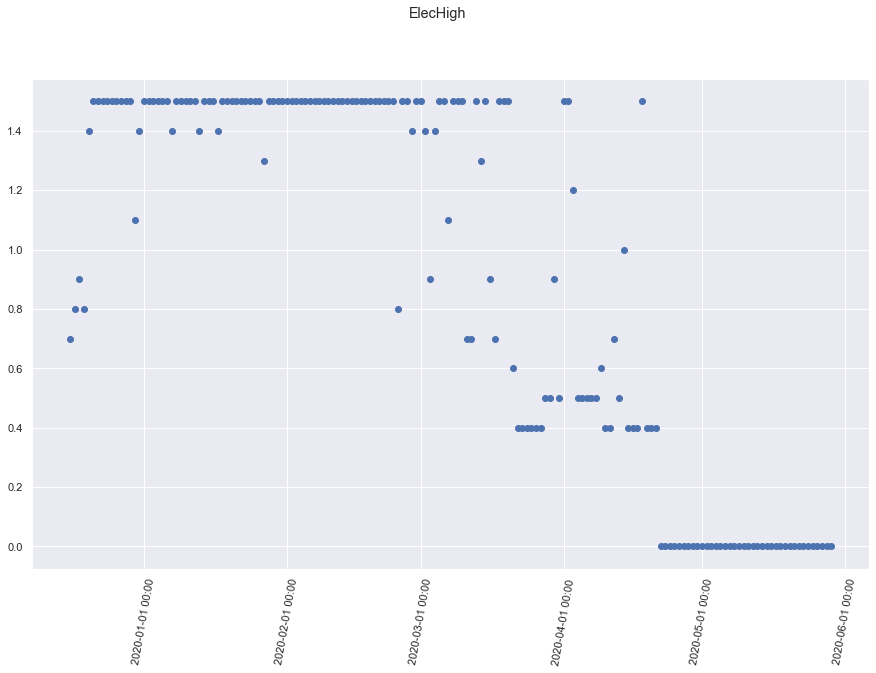

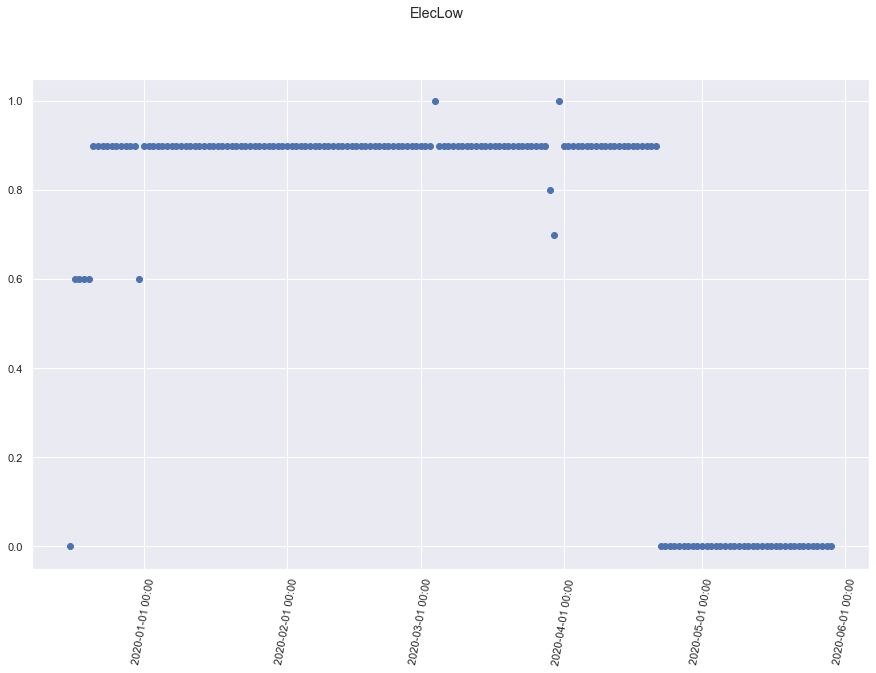

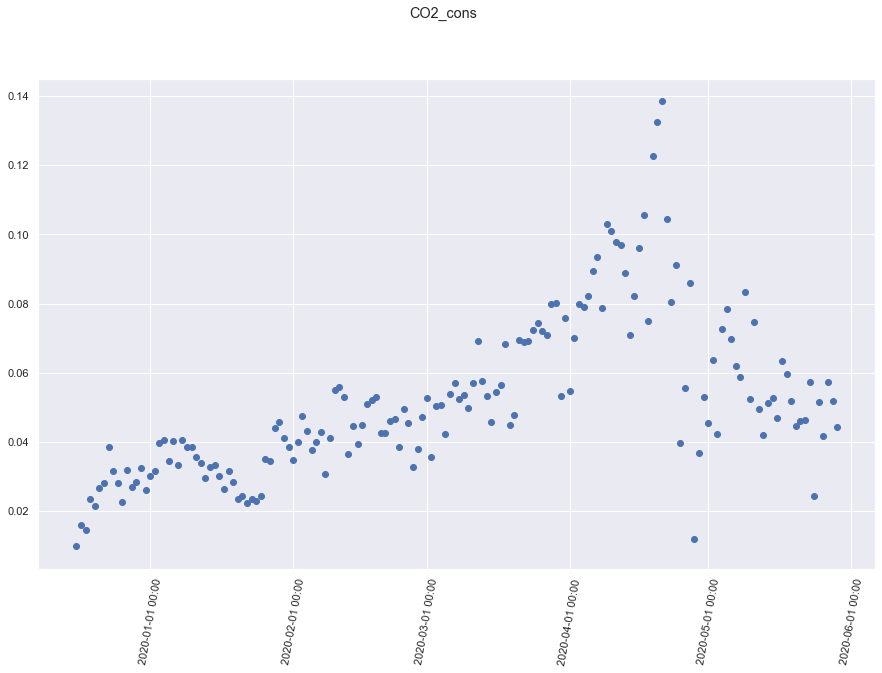

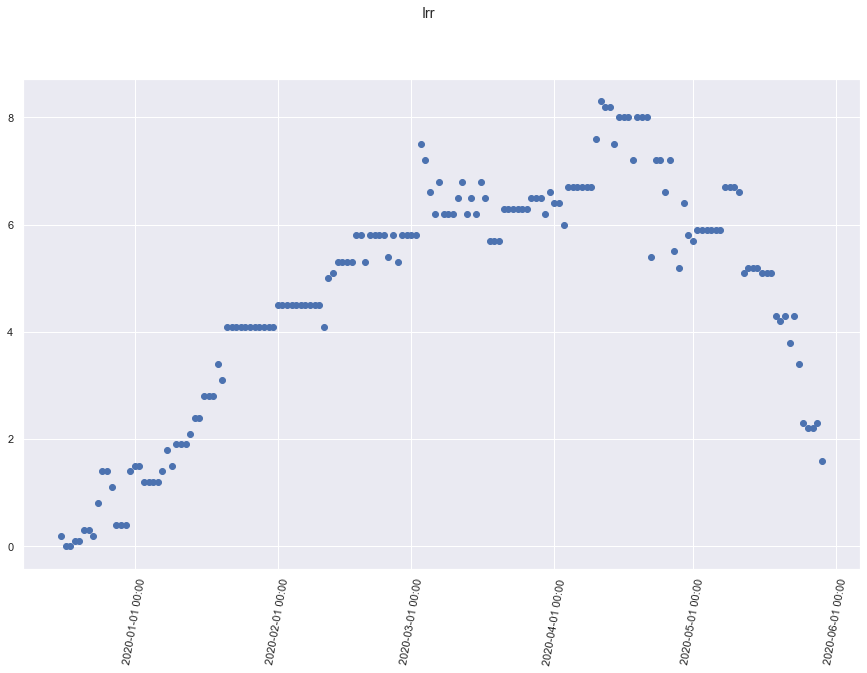

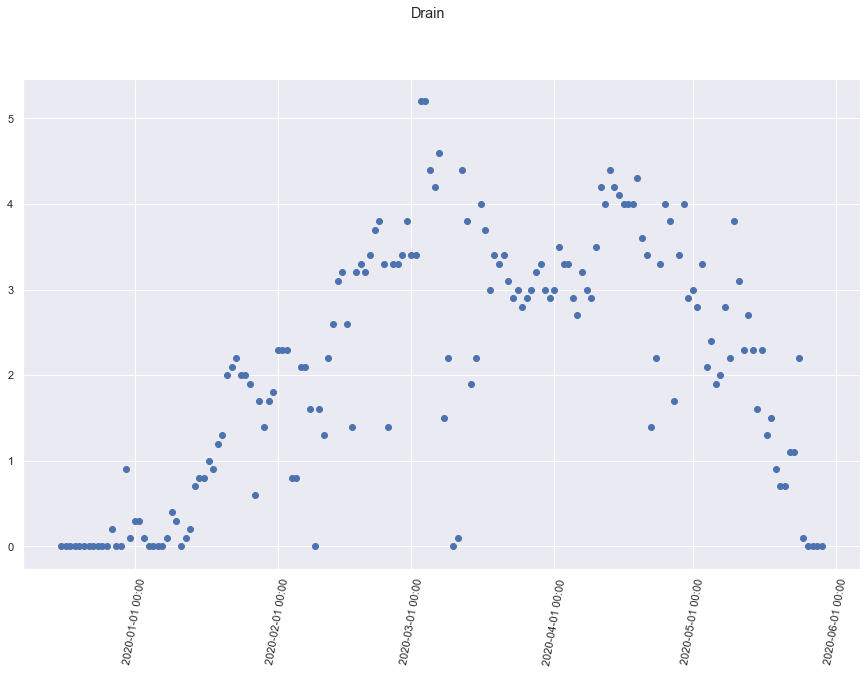

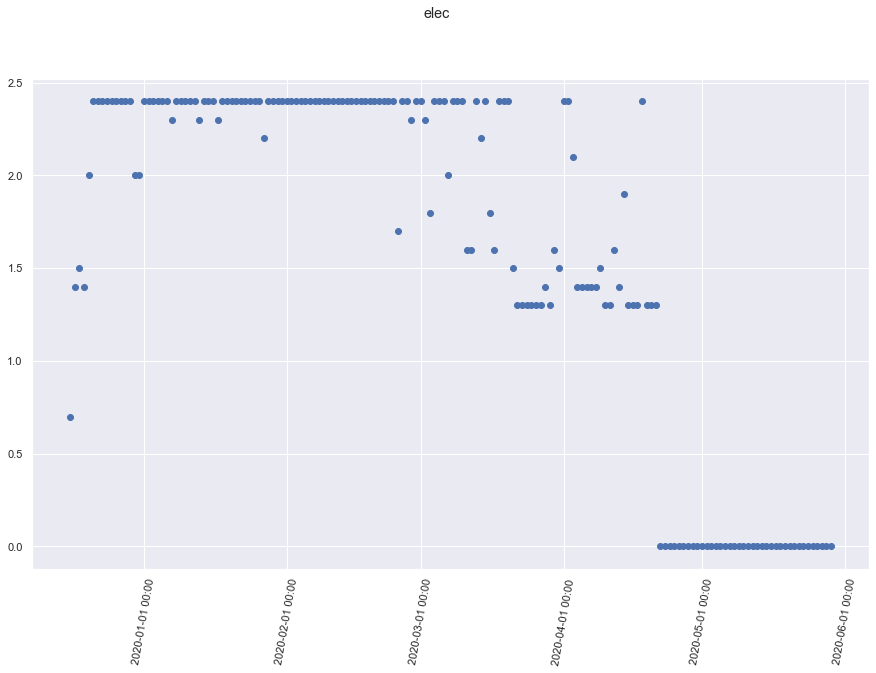

In [5]:
dates = matplotlib.dates.date2num(new_times)
sns.set(rc={'figure.figsize':(15,10)})
for col in df.columns[1:]:
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation= 80)
    # plot end times vs start times
    ax.scatter(new_times,df[col])
    # reformat ticks as HH:MM
    hh_mm = DateFormatter('%Y-%m-%d %H:%M')
    ax.xaxis.set_major_formatter(hh_mm)

    fig.suptitle(col)
    plt.pause(1)